In [67]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [47]:
# Load the data
df = pd.read_csv("/content/bbc_data.csv")
df.head()

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment


In [48]:
df.shape

(2225, 2)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [50]:
df.isnull().sum()

,0
data,0
labels,0


In [51]:
df.duplicated().sum()

np.int64(99)

In [52]:
df.drop_duplicates(inplace=True)

In [53]:
df['labels'].unique()

array(['entertainment', 'business', 'sport', 'politics', 'tech'],
      dtype=object)

<Axes: ylabel='count'>

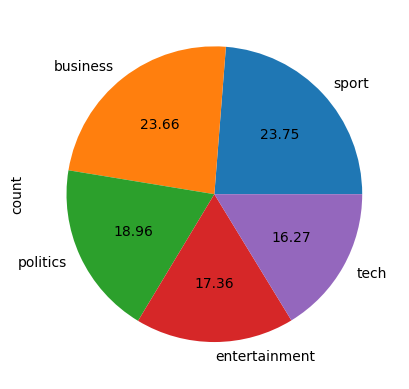

In [54]:
df['labels'].value_counts().plot(kind = 'pie', autopct = "%.2f")

In [55]:
def preprocess_text(text):
  """Preprocess text by converting to lowercase ,removing punctuation and stopwords"""
  text = text.lower()

  #Remobe the URLS's
  text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

  # Remove the emojis
  text = text.encode('ascii', 'ignore').decode('ascii')

  # Remove hashtags
  text = re.sub(r"#\S+", '', text)

  # Remove the puunctuation
  text = text.translate(str.maketrans('', '', string.punctuation))

  # Remove stop words
  stop_words = set(stopwords.words('english'))
  words = text.split()
  words = [word for word in words if not word in stop_words]
  text = ' '.join(words)

  return text

In [56]:
df['pre_process_text'] = df['data'].apply(preprocess_text)

In [57]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
def lemmatize_and_stem(text):
  """ Lemmatize and stem a text """

  #Toknieze the text
  tokens = nltk.word_tokenize(text)

  #Lemmatize and stem each token
  procceds_tokens = []
  for token in tokens:
    lema = lemmatizer.lemmatize(token)
    stem = stemmer.stem(lema)
    procceds_tokens.append(stem)

  return " ".join(procceds_tokens)

In [58]:
df['pre_process_text'] = df['pre_process_text'].apply(lemmatize_and_stem)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df['pre_process_text'], df['labels'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [65]:
models = {
    "logistic Regression":LogisticRegression(),
    "Random Forest":RandomForestClassifier(),
    "Descion Tree":DecisionTreeClassifier()
}

models_accuracy = {}


for x,y in models.items():
  cls = y
  cls.fit(X_train_tfidf,y_train)
  y_pred = cls.predict(X_test_tfidf)
  acc = accuracy_score(y_test,y_pred)
  models_accuracy[x] = acc

In [66]:
models_accuracy

{'logistic Regression': 0.971830985915493,
 'Random Forest': 0.971830985915493,
 'Descion Tree': 0.8192488262910798}

RF and DS give me the good result

In [69]:
# Get the Random Forest model from the dictionary
rf_model = models["Random Forest"]

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_tfidf)

# Display the classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Classification Report for Random Forest:
               precision    recall  f1-score   support

     business       0.95      0.97      0.96       108
entertainment       0.99      0.95      0.97        74
     politics       0.95      0.99      0.97        80
        sport       0.99      0.99      0.99        91
         tech       0.99      0.96      0.97        73

     accuracy                           0.97       426
    macro avg       0.97      0.97      0.97       426
 weighted avg       0.97      0.97      0.97       426

